<a href="https://colab.research.google.com/github/kesar19051/BIO-213--IQB-Assignments/blob/master/DMG_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing and data splitting

*   Checked for null values
* Removed duplicate values
*   Not identified outliers, will have to see various plots for the same


In [98]:
# main libraries
import pandas as pd
import numpy as np
import time
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from itertools import cycle

# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
import pydotplus
plt.style.use('ggplot')

Checking for missing values

In [99]:
#checking for missing values
df = pd.read_csv('data_1.csv')
print(df.shape)
df.isnull().any().sum()

(1450, 22)


0

Checking for duplicate values.

In [100]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(df.shape)

(1438, 22)


Detecting outliers

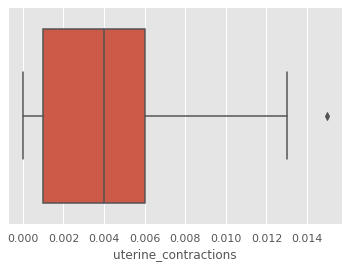

In [101]:
import seaborn as sns
sns.boxplot(df['uterine_contractions'])

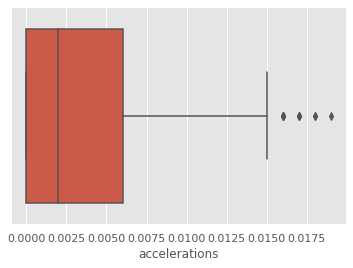

In [102]:
sns.boxplot(df['accelerations'])

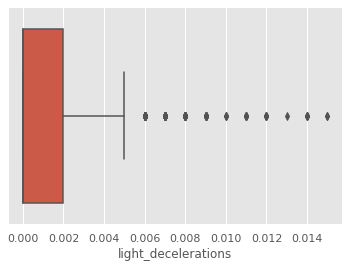

In [103]:
sns.boxplot(df['light_decelerations'])

Checking for the percentage of different fetal healths to match the percentage while splitting the dataset.

In [104]:
#Checking for the percentage of different fetal healths
All = df.shape[0]
normal = df[df['fetal_health'] == 1]
suspect = df[df['fetal_health'] == 2]
pathological = df[df['fetal_health'] == 3]

x = len(normal)/All
y = len(suspect)/All
z = len(pathological)/All

print('normal :',x*100,'%')
print('suspect :',y*100,'%')
print('pathological :',z*100,'%')

normal : 82.82336578581364 %
suspect : 13.76912378303199 %
pathological : 3.4075104311543813 %


Splitting the dataset


*   Random attribute set so that same results are displayed.
*   Stratify is set to the label to keep the distribution equal as the original data set.



In [105]:
# split a dataset into train and test sets
features = df.loc[ : , df.columns != 'fetal_health']
labels = pd.DataFrame(df['fetal_health'])

# print(features)
# print(labels)

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state = 20, stratify = labels)
# print(y_test.shape)

Checking whether the data has been split correctly.

In [106]:
#Checking for the percentage of different fetal healths
All = y_train.shape[0]
normal = y_train[y_train['fetal_health'] == 1]
suspect = y_train[y_train['fetal_health'] == 2]
pathological = y_train[y_train['fetal_health'] == 3]

x = len(normal)/All
y = len(suspect)/All
z = len(pathological)/All

print('normal :',x*100,'%')
print('suspect :',y*100,'%')
print('pathological :',z*100,'%')

normal : 82.86956521739131 %
suspect : 13.73913043478261 %
pathological : 3.3913043478260874 %


In [107]:
#Checking for the percentage of different fetal healths
All = y_test.shape[0]
normal = y_test[y_test['fetal_health'] == 1]
suspect = y_test[y_test['fetal_health'] == 2]
pathological = y_test[y_test['fetal_health'] == 3]

x = len(normal)/All
y = len(suspect)/All
z = len(pathological)/All

print('normal :',x*100,'%')
print('suspect :',y*100,'%')
print('pathological :',z*100,'%')

normal : 82.63888888888889 %
suspect : 13.88888888888889 %
pathological : 3.4722222222222223 %


# (A) Training

# Q1. Creating the decision tree

In [108]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[232,   5,   1],
       [  5,  34,   1],
       [  0,   0,  10]])

Accuracy: 0.9583333333333334
Recall: 0.9415966386554621
Precision: 0.8946770529049011
Report:                precision    recall  f1-score   support

           1       0.98      0.97      0.98       238
           2       0.87      0.85      0.86        40
           3       0.83      1.00      0.91        10

    accuracy                           0.96       288
   macro avg       0.89      0.94      0.92       288
weighted avg       0.96      0.96      0.96       288



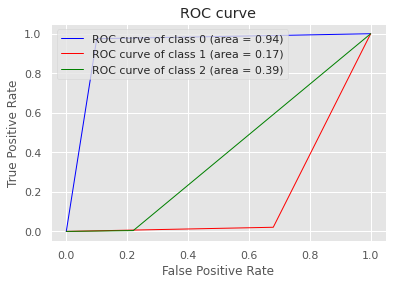

In [109]:
def allMeasures():
  #Predict the response for test dataset
  y_pred = clf.predict(X_test)
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  print("Recall:",metrics.recall_score(y_test,y_pred,average='macro'))
  print("Precision:",metrics.precision_score(y_test,y_pred,average='macro'))
  print("Report: ", metrics.classification_report(y_test,y_pred))

  colors = cycle(['blue', 'red', 'green'])

  fpr={}
  tpr={}
  thresh={}
  y_score = clf.predict_proba(X_test)
  roc_auc = dict()
  lw=1

  for i in range(3):
    fpr[i],tpr[i],_ = roc_curve(y_test, y_score[:,i],pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

  for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# plt.plot(fpr[0],tpr[0],color='blue',label='Normal')
# plt.plot(fpr[1],tpr[1],color='red',label='Pathological')
# plt.plot(fpr[2],tpr[2],color='green',label='Suspect')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='best')
  plt.show()

allMeasures()

In [110]:
def allMeasures_(X_test,y_test,clf,title):
  #Predict the response for test dataset
  y_pred = clf.predict(X_test)

  colors = cycle(['blue', 'red', 'green'])

  fpr={}
  tpr={}
  thresh={}
  y_score = clf.predict_proba(X_test)
  roc_auc = dict()
  lw=1

  for i in range(3):
    fpr[i],tpr[i],_ = roc_curve(y_test, y_score[:,i],pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

  for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# plt.plot(fpr[0],tpr[0],color='blue',label='Normal')
# plt.plot(fpr[1],tpr[1],color='red',label='Pathological')
# plt.plot(fpr[2],tpr[2],color='green',label='Suspect')
  plt.title(title)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='best')
  plt.show()

Decision tree visualiser

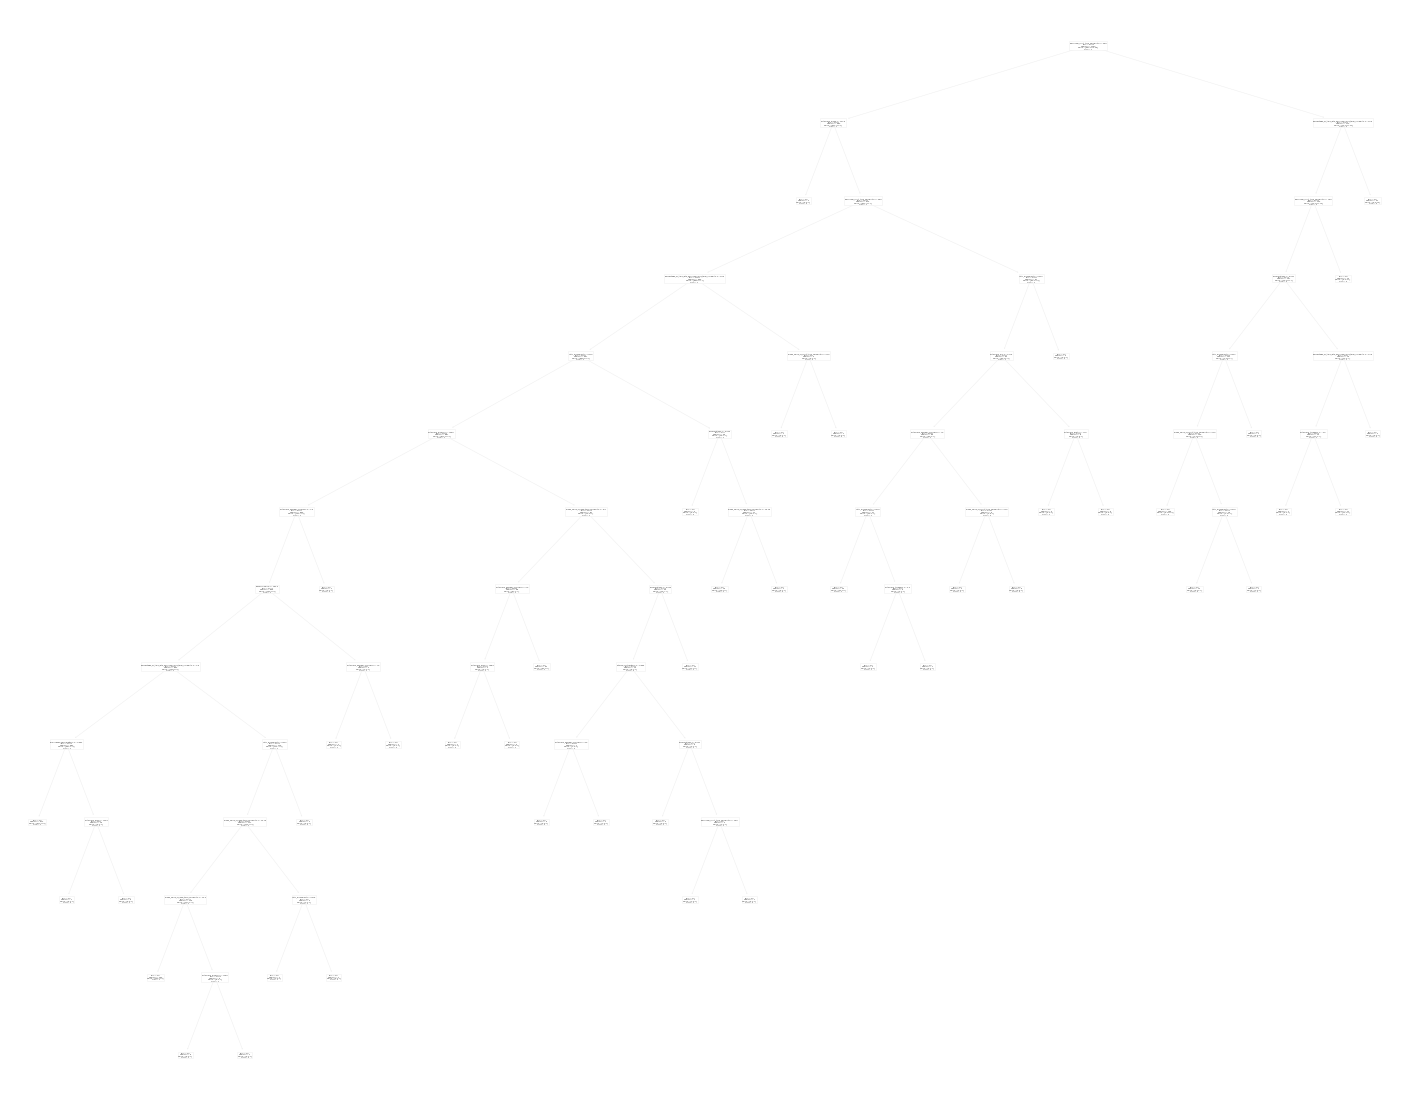

In [111]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,feature_names=features.columns,class_names=['1','2','3'])
fig.savefig("DT_A_1.pdf")

Finding the depth of the tree

In [112]:
dep = clf.tree_.max_depth

In [113]:
print(dep)

13


# Q2. Training the tree for five different depths.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0.9027777777777778, 0.9166666666666666, 0.9340277777777778, 0.9409722222222222, 0.9409722222222222, 0.9548611111111112, 0.9583333333333334, 0.9513888888888888, 0.9583333333333334, 0.9548611111111112, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334]


Text(0, 0.5, 'Accuracy')

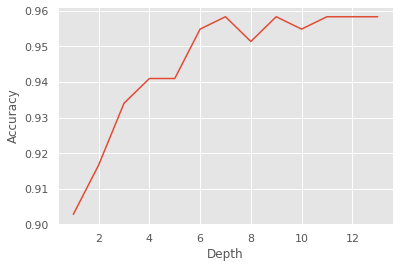

In [114]:
accuracy = []
depth = []
d=1
# Train Decision Tree Classifer
while d<=dep:
  depth.append(d)
  clf = DecisionTreeClassifier(criterion='entropy',max_depth=d)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy.append(metrics.accuracy_score(y_test,y_pred))
  d = d+1

print(depth)
print(accuracy)
plt.plot(depth, accuracy)
 
# naming the x axis
plt.xlabel('Depth')
# naming the y axis
plt.ylabel('Accuracy')

# Q3. Varying hyperparameters

Reasoning of some parameters left like:

Min_samples_split

min_samples_leaf

max_leaf_node

class_weight



1. Criterion

Accuracy: 0.9583333333333334
Recall: 0.9346638655462184
Precision: 0.9000402075715884
Report:                precision    recall  f1-score   support

           1       0.97      0.98      0.98       238
           2       0.89      0.82      0.86        40
           3       0.83      1.00      0.91        10

    accuracy                           0.96       288
   macro avg       0.90      0.93      0.91       288
weighted avg       0.96      0.96      0.96       288



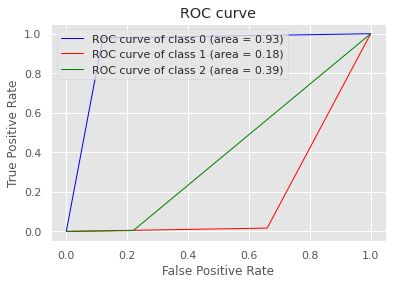

In [115]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train,y_train)
allMeasures()

The results obtained using Entropy are better than Gini. Entropy is a measure of information that indicates the disorder of the features with the target while the gini impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled. 
The entropy takes values between 0 and 1 while Gini is half of it: it takes value between 0 and 0.5

2. Splitter

Accuracy: 0.9513888888888888
Recall: 0.8541316526610645
Precision: 0.8916264866602379
Report:                precision    recall  f1-score   support

           1       0.96      0.99      0.98       238
           2       0.91      0.78      0.84        40
           3       0.80      0.80      0.80        10

    accuracy                           0.95       288
   macro avg       0.89      0.85      0.87       288
weighted avg       0.95      0.95      0.95       288



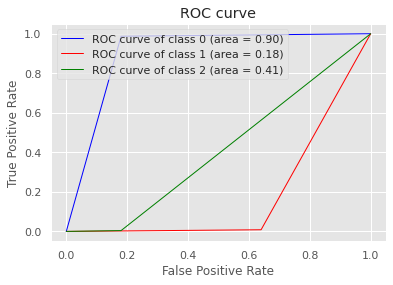

In [116]:
clf = DecisionTreeClassifier(splitter="random")
clf = clf.fit(X_train,y_train)
allMeasures()

Splitter='random' gives a degradation of result. The accuracy, precision and recall are less than the base model. This is because 'random' splitter uses a random uniform function while 'best' splitter evaluates all splits using the criterion before splitting.

3. Min-samples split

Accuracy: 0.9479166666666666
Recall: 0.9235294117647058
Precision: 0.8820089439284486
Report:                precision    recall  f1-score   support

           1       0.97      0.97      0.97       238
           2       0.84      0.80      0.82        40
           3       0.83      1.00      0.91        10

    accuracy                           0.95       288
   macro avg       0.88      0.92      0.90       288
weighted avg       0.95      0.95      0.95       288



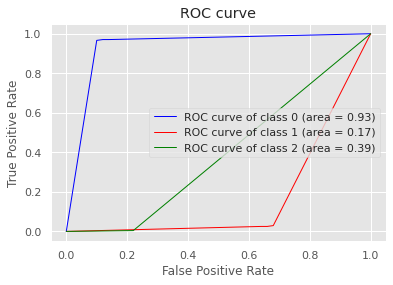

In [117]:
clf = DecisionTreeClassifier(min_samples_split=5)
clf = clf.fit(X_train,y_train)
allMeasures()

4. Max depth

Accuracy: 0.9444444444444444
Recall: 0.9082633053221288
Precision: 0.8843772640453138
Report:                precision    recall  f1-score   support

           1       0.96      0.97      0.97       238
           2       0.86      0.75      0.80        40
           3       0.83      1.00      0.91        10

    accuracy                           0.94       288
   macro avg       0.88      0.91      0.89       288
weighted avg       0.94      0.94      0.94       288



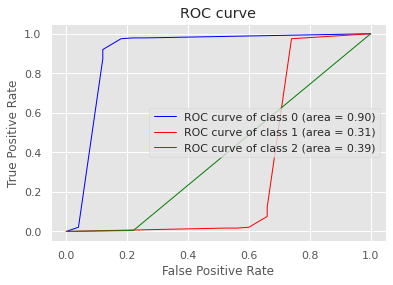

In [118]:
clf = DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train,y_train)
allMeasures()

As seen from the above accuracy vs depth graph, the accuracy increases as the depth increases. This is because with increasing depth the model becomes more and more complex and captures more information about the data. However, with high depth the model tends to overfit and keeping the restricting the max_depth of the tree can help combat overfitting.

5. Min Samples Leaf

Accuracy: 0.9409722222222222
Recall: 0.840266106442577
Precision: 0.9660991182730313
Report:                precision    recall  f1-score   support

           1       0.94      1.00      0.97       238
           2       0.96      0.62      0.76        40
           3       1.00      0.90      0.95        10

    accuracy                           0.94       288
   macro avg       0.97      0.84      0.89       288
weighted avg       0.94      0.94      0.94       288



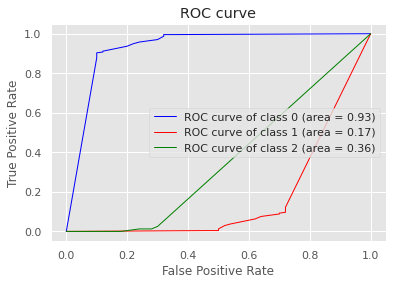

In [119]:
clf = DecisionTreeClassifier(min_samples_leaf=10)
clf = clf.fit(X_train,y_train)
allMeasures()

With this parameter there is an increase in the performance of the model. According to scikit-learn, we can use min_samples_leaf to ensure that multiple samples inform every decision in the tree, by controlling which splits will be considered. 

6. Max Features

Accuracy: 0.9270833333333334
Recall: 0.8943277310924369
Precision: 0.8314713268077693
Report:                precision    recall  f1-score   support

           1       0.96      0.96      0.96       238
           2       0.76      0.72      0.74        40
           3       0.77      1.00      0.87        10

    accuracy                           0.93       288
   macro avg       0.83      0.89      0.86       288
weighted avg       0.93      0.93      0.93       288



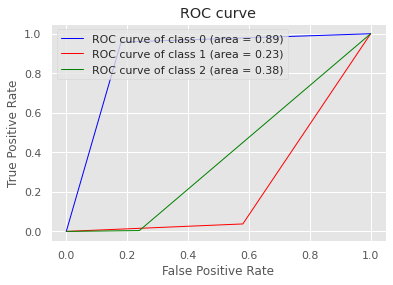

In [120]:
clf = DecisionTreeClassifier(max_features=8)
clf = clf.fit(X_train,y_train)
allMeasures()

Max_features tells number of features to consider when looking for the best split. By default it looks at all the features for the split. However, here it looks at the limited features due to which we see a decreased performance scores in terms of accuracy, precision and recall. If we keep it default, it can lead to overfitting.

7. Class Weight

Accuracy: 0.9652777777777778
Recall: 0.9443977591036413
Precision: 0.9104439167200674
Report:                precision    recall  f1-score   support

           1       0.98      0.98      0.98       238
           2       0.92      0.85      0.88        40
           3       0.83      1.00      0.91        10

    accuracy                           0.97       288
   macro avg       0.91      0.94      0.92       288
weighted avg       0.97      0.97      0.97       288



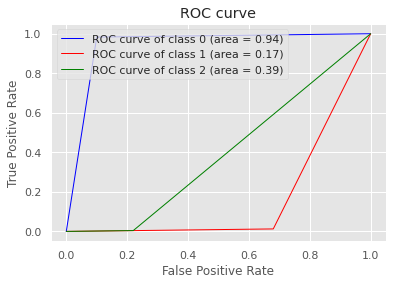

In [121]:
clf = DecisionTreeClassifier(class_weight="balanced")
clf = clf.fit(X_train,y_train)
allMeasures()

class_weight is used to provide a weight or bias for each output class. But what does this actually mean, see when the algorithm calculates the entropy or gini impurity to make the split at a node,

8. Max Leaf Nodes

Accuracy: 0.9409722222222222
Recall: 0.8721988795518207
Precision: 0.912957264957265
Report:                precision    recall  f1-score   support

           1       0.94      0.99      0.97       238
           2       0.96      0.62      0.76        40
           3       0.83      1.00      0.91        10

    accuracy                           0.94       288
   macro avg       0.91      0.87      0.88       288
weighted avg       0.94      0.94      0.94       288



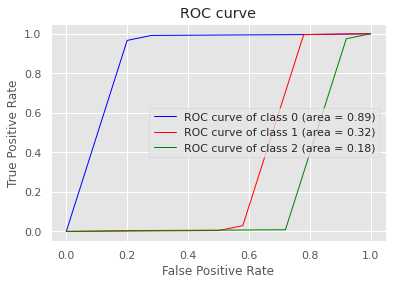

In [122]:
clf = DecisionTreeClassifier(max_leaf_nodes=6)
clf = clf.fit(X_train,y_train)
allMeasures()

# (B) Post Pruning

1) Removing a random node

1
2
71
72
73
74
75
77
81
82
Accuracy: 0.9444444444444444
Recall: 0.8555322128851541
Precision: 0.9583448275862069
Report:                precision    recall  f1-score   support

           1       0.94      0.99      0.97       238
           2       0.93      0.68      0.78        40
           3       1.00      0.90      0.95        10

    accuracy                           0.94       288
   macro avg       0.96      0.86      0.90       288
weighted avg       0.94      0.94      0.94       288



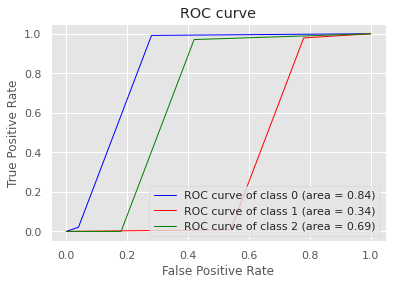

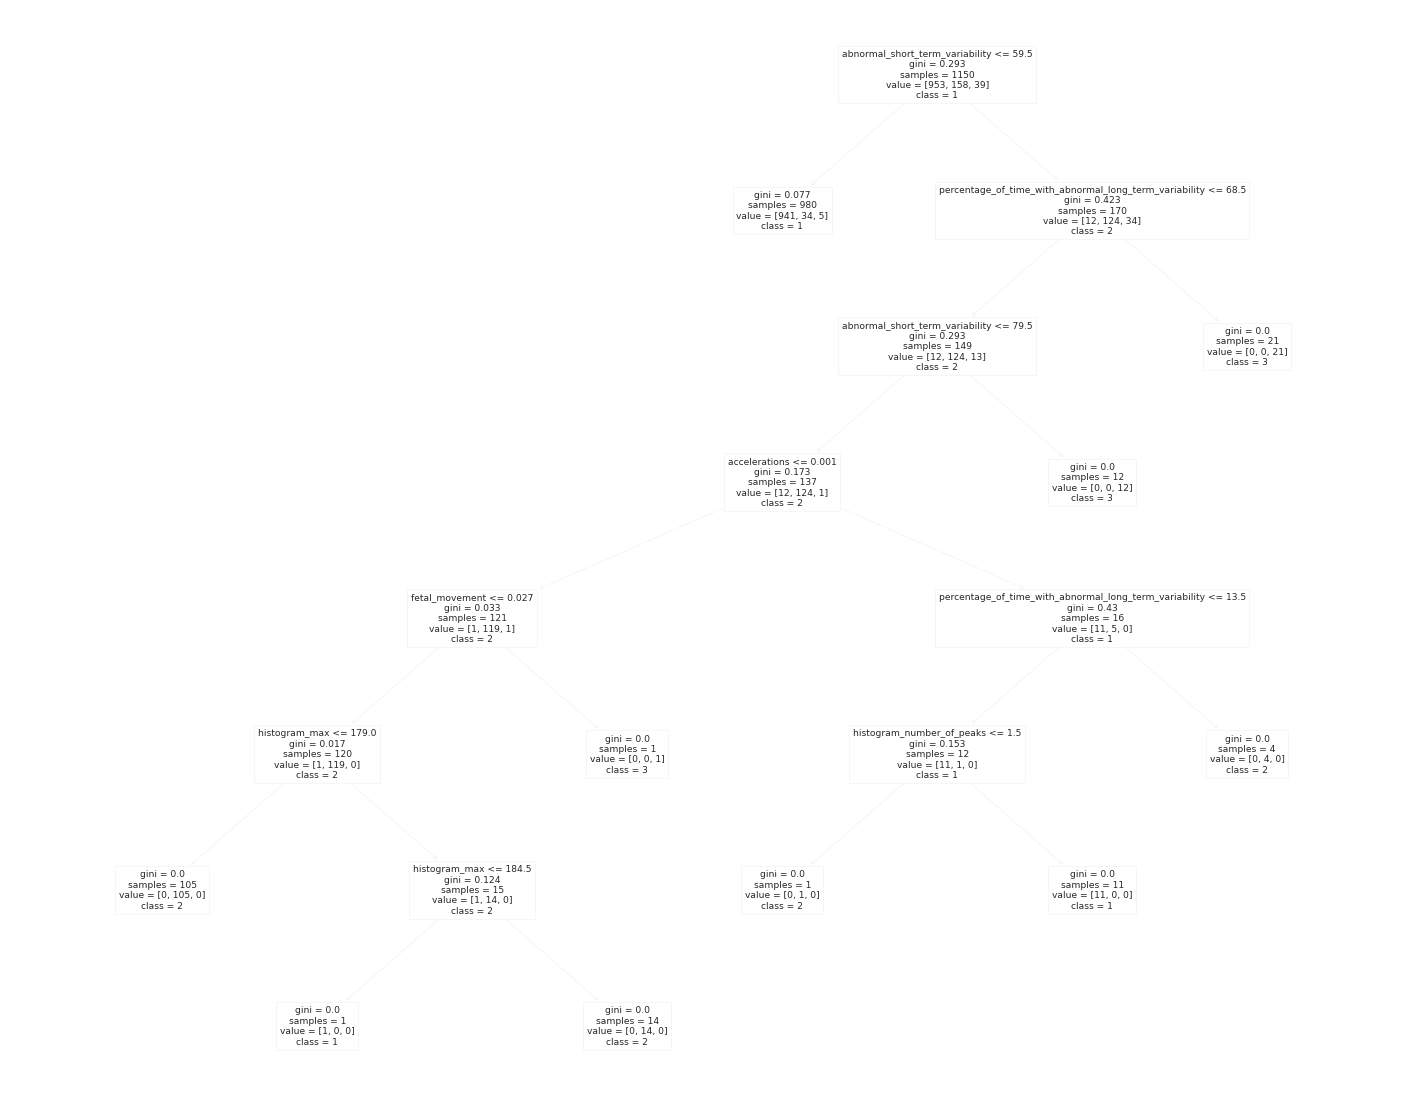

In [123]:
from sklearn import tree
from sklearn.tree._tree import TREE_LEAF, TREE_UNDEFINED

def is_leaf(inner_tree, index):
    # Check whether node is leaf node
    return (inner_tree.children_left[index] == TREE_LEAF and 
            inner_tree.children_right[index] == TREE_LEAF)

def prune_index(inner_tree, decisions, index=0):
  print(inner_tree.children_left[index])
    # Here I am checking the index and breaking the tree at node with index = 2 or 4...
  if inner_tree.children_left[index] == 2 or inner_tree.children_left[index] == 4:
    inner_tree.children_left[index] = TREE_LEAF
    inner_tree.children_right[index] = TREE_LEAF
    inner_tree.feature[index] = TREE_UNDEFINED
    return

  if not is_leaf(inner_tree, inner_tree.children_left[index]):
      prune_index(inner_tree, decisions, inner_tree.children_left[index])
  if not is_leaf(inner_tree, inner_tree.children_right[index]):
      prune_index(inner_tree, decisions, inner_tree.children_right[index])


def prune_leaves(mdl):
    # Remove leaves if both 
    decisions = mdl.tree_.value.argmax(axis=2).flatten().tolist() # Decision for each node
    prune_index(mdl.tree_, decisions)

def allMeasures():
  #Predict the response for test dataset
  y_pred = clf.predict(X_test)
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  print("Recall:",metrics.recall_score(y_test,y_pred,average='macro'))
  print("Precision:",metrics.precision_score(y_test,y_pred,average='macro'))
  print("Report: ", metrics.classification_report(y_test,y_pred))

  colors = cycle(['blue', 'red', 'green'])

  fpr={}
  tpr={}
  thresh={}
  y_score = clf.predict_proba(X_test)
  roc_auc = dict()
  lw=1

  for i in range(3):
    fpr[i],tpr[i],_ = roc_curve(y_test, y_score[:,i],pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

  for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# plt.plot(fpr[0],tpr[0],color='blue',label='Normal')
# plt.plot(fpr[1],tpr[1],color='red',label='Pathological')
# plt.plot(fpr[2],tpr[2],color='green',label='Suspect')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='best')
  plt.show()



clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
prune_leaves(clf)

allMeasures()

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,feature_names=features.columns,class_names=['1','2','3'])
fig.savefig("DT_B_1.pdf")


2) 
- Cost Complexity Pruning

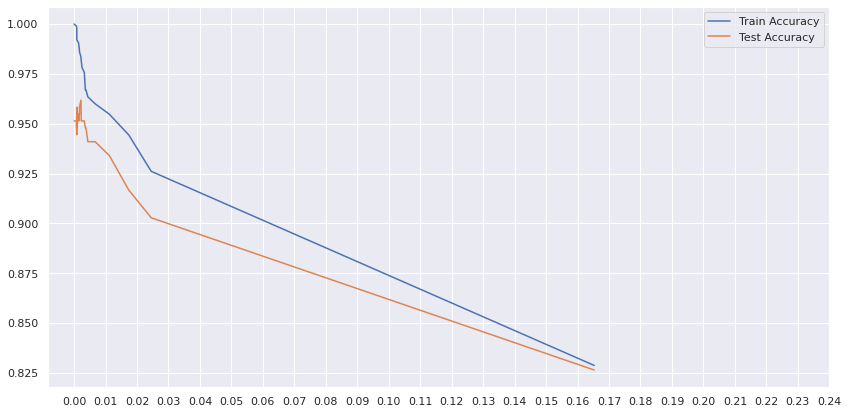

In [124]:
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path['ccp_alphas']

train_accuracy, test_accuracy = [],[]
for i in ccp_alphas:
  tree = DecisionTreeClassifier(ccp_alpha = i)
  tree.fit(X_train, y_train)
  y_train_pred = tree.predict(X_train)
  y_test_pred = tree.predict(X_test)
  train_accuracy.append(accuracy_score(y_train, y_train_pred))
  test_accuracy.append(accuracy_score(y_test, y_test_pred))

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=train_accuracy,x=ccp_alphas,label="Train Accuracy")
sns.lineplot(y=test_accuracy,x=ccp_alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

Clearly we can see that the test accuracy is maximum when alpha = 0.0075 (approximately).

In [125]:
clf = DecisionTreeClassifier(ccp_alpha=0.0075)
clf = clf.fit(X_train,y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

0.96 0.9409722222222222


In [126]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Recall:",metrics.recall_score(y_test,y_test_pred,average='macro'))
print("Precision:",metrics.precision_score(y_test,y_test_pred,average='macro'))
print("Report: ", metrics.classification_report(y_test,y_test_pred))

Accuracy: 0.9409722222222222
Recall: 0.840266106442577
Precision: 0.9660991182730313
Report:                precision    recall  f1-score   support

           1       0.94      1.00      0.97       238
           2       0.96      0.62      0.76        40
           3       1.00      0.90      0.95        10

    accuracy                           0.94       288
   macro avg       0.97      0.84      0.89       288
weighted avg       0.94      0.94      0.94       288



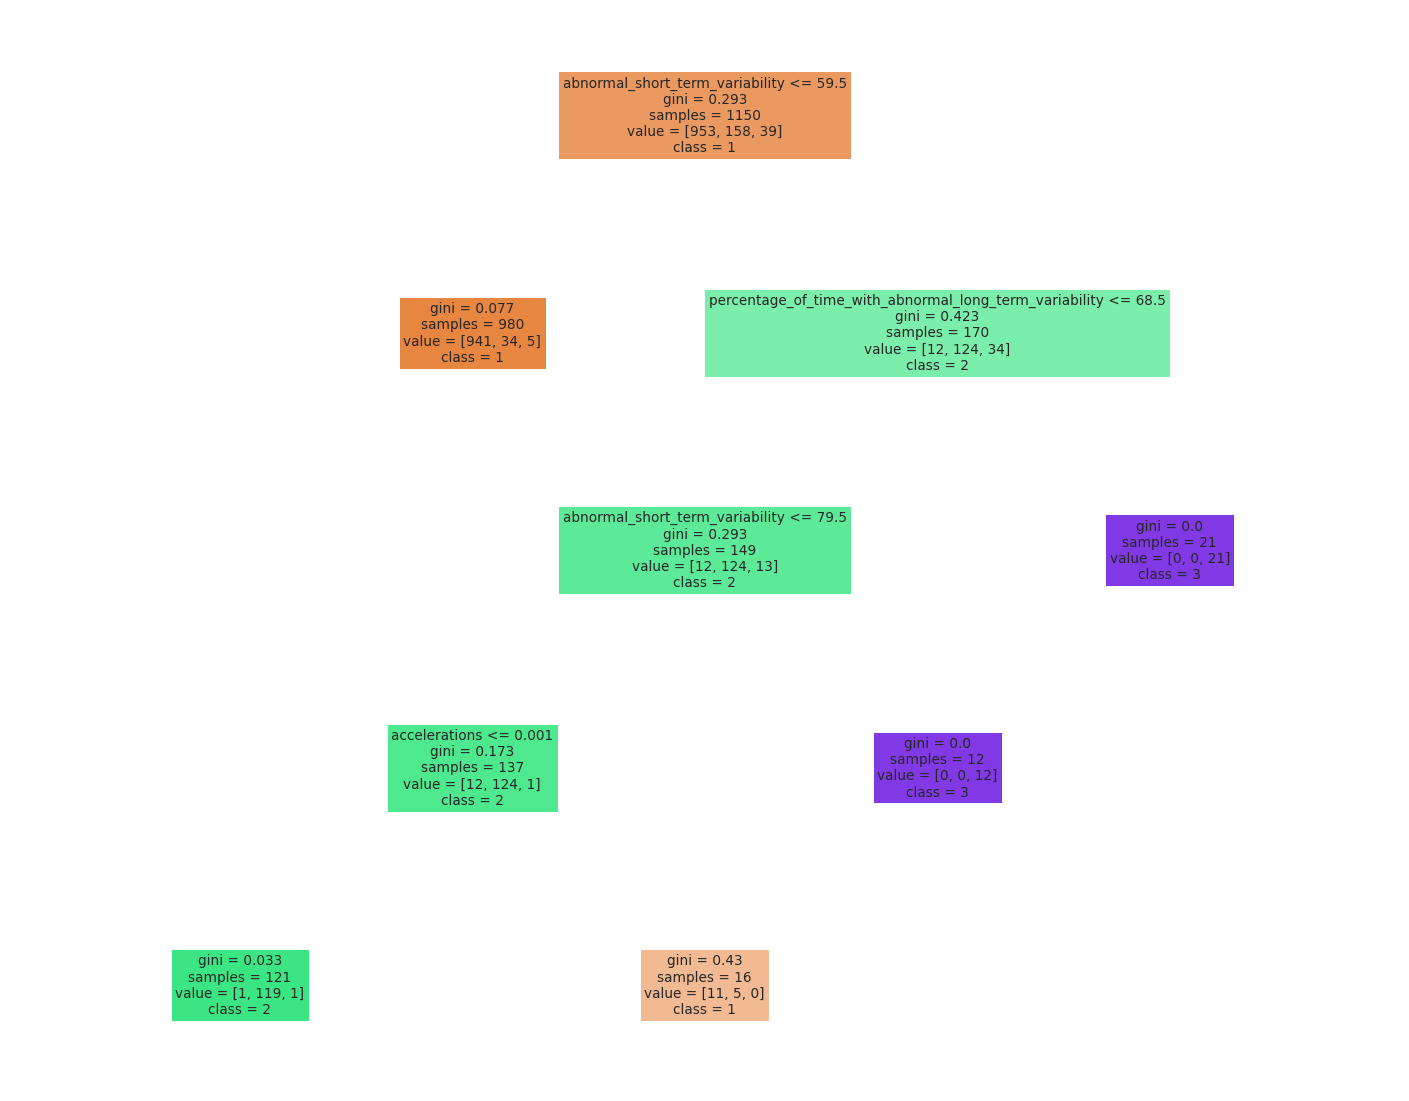

In [127]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,feature_names=features.columns,class_names=['1','2','3'], filled = True)
fig.savefig("DT_B_2_CC.pdf")

- Pre-Pruning using GridSearchCV (Best Minimum Samples at Leaf Tree)

In [128]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

0.9782608695652174 0.9479166666666666


In [129]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Recall:",metrics.recall_score(y_test,y_test_pred,average='macro'))
print("Precision:",metrics.precision_score(y_test,y_test_pred,average='macro'))
print("Report: ", metrics.classification_report(y_test,y_test_pred))

Accuracy: 0.9479166666666666
Recall: 0.9096638655462185
Precision: 0.8928320639550585
Report:                precision    recall  f1-score   support

           1       0.96      0.98      0.97       238
           2       0.88      0.75      0.81        40
           3       0.83      1.00      0.91        10

    accuracy                           0.95       288
   macro avg       0.89      0.91      0.90       288
weighted avg       0.95      0.95      0.95       288



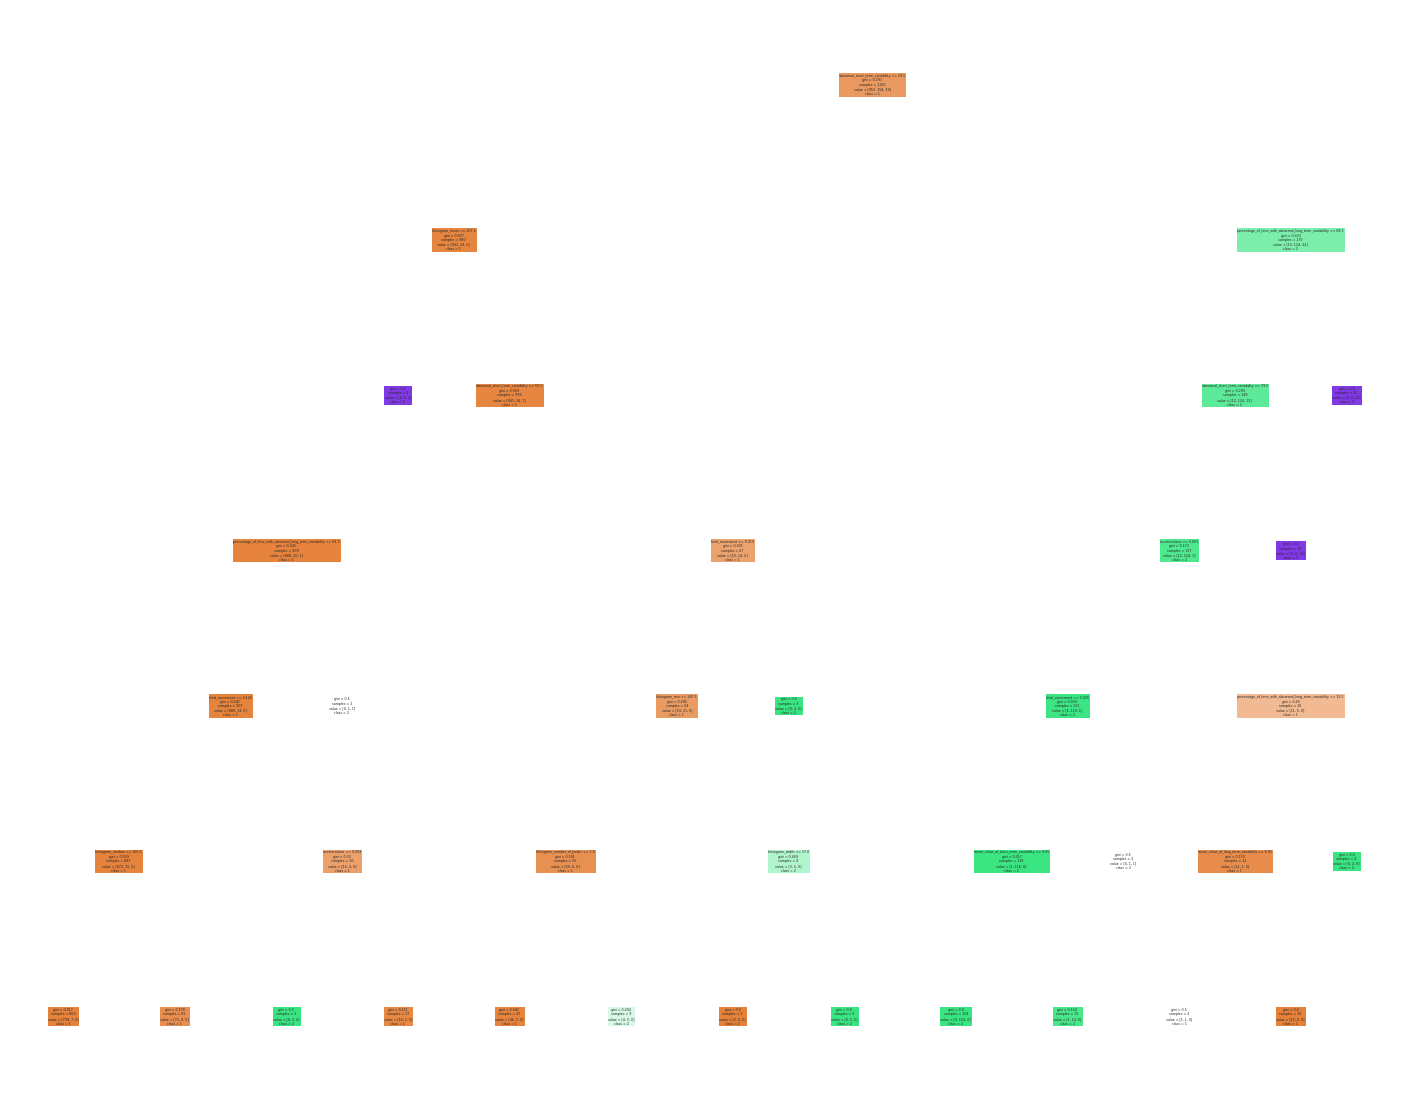

In [130]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,feature_names=features.columns,class_names=['1','2','3'], filled = True)
fig.savefig("DT_B_2_XX.pdf")

# (C) Experiments

# Q1. Data Augmentation

Initial Decision Tree and its measures
ACCURACY: 0.9583
Precision: 0.8947
Recall: 0.9416


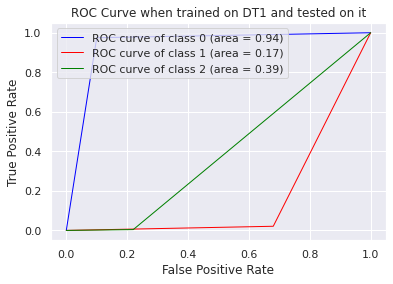


Augmented Decision Tree with test data of Dataset 1
ACCURACY: 0.9792
Precision: 0.9607
Recall: 0.9847


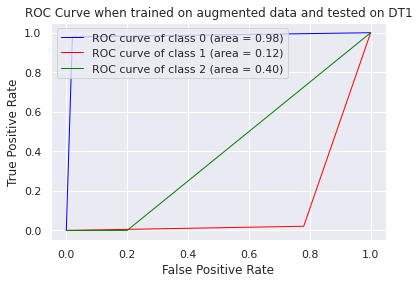


Augmented Decision Tree with test data of Dataset 2
ACCURACY: 0.9778
Precision: 0.9894
Recall: 0.9558


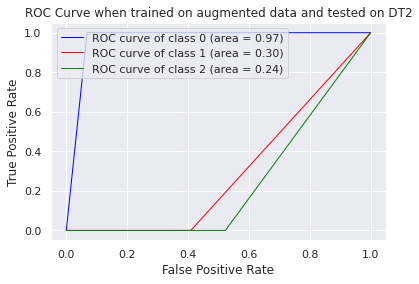

In [131]:
# Exetremely Fast Decision Tree i.e. Hoeffding Any Time Tree, described in
# "Extremely Fast Decision Tree" (Manapragada, Webb & Salehi, 2018)
#
# this program contains 2 classes: Efdt, EfdtNode
# changed to CART: Gini index

from sklearn.model_selection import train_test_split
import time
import numpy as np
import pandas as pd
from multiprocessing import Pool
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from itertools import cycle
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")


# EFDT node class
class EfdtNode:
    def __init__(self, possible_split_features):
        """
        nijk: statistics of feature i, value j, class
        possible_split_features: features list
        """
        self.parent = None
        self.left_child = None
        self.right_child = None
        self.split_feature = None
        self.split_value = None
        self.split_g = None
        self.new_examples_seen = 0
        self.total_examples_seen = 0
        self.class_frequency = {}
        self.nijk = {i: {} for i in possible_split_features}
        self.possible_split_features = possible_split_features

    def add_children(self, left, right, split_feature, split_value):
        self.left_child = left
        self.right_child = right
        left.parent = self
        right.parent = self
        self.nijk = {i: {} for i in self.nijk.keys()}

        if isinstance(split_value, list):
            left_value = split_value[0]
            right_value = split_value[1]
            if len(left_value) <= 1:
                new_features = [None if f == split_feature else f for f in left.possible_split_features]
                left.possible_split_features = new_features
            if len(right_value) <= 1:
                new_features = [None if f == split_feature else f for f in right.possible_split_features]
                right.possible_split_features = new_features

    def is_leaf(self):
        return self.left_child is None and self.right_child is None

    # update node stats in order to calculate Gini
    def update_stats(self, x, y):
        nijk = self.nijk
        feats = self.possible_split_features
        iterator = [f for f in feats if f is not None]
        for i in iterator:
            value = x[feats.index(i)]

            if value not in nijk[i]:
                nijk[i][value] = {y: 1}
            else:
                try:
                    nijk[i][value][y] += 1
                except KeyError:
                    nijk[i][value][y] = 1

        self.total_examples_seen += 1
        self.new_examples_seen += 1
        class_frequency = self.class_frequency
        try:
            class_frequency[y] += 1
        except KeyError:
            class_frequency[y] = 1

    # the most frequent classification
    def most_frequent(self):
        if self.class_frequency:
            prediction = max(self.class_frequency, key=self.class_frequency.get)
        else:
            # if self.class_frequency dict is empty, go back to parent
            class_frequency = self.parent.class_frequency
            prediction = max(class_frequency, key=class_frequency.get)
        return prediction

    def check_not_splitting(self, class_frequency):
        # compute Gini index for not splitting
        g_d1 = 1
        # g_d2 = 1
        # most = max(class_frequency, key=class_frequency.get)
        n = sum(class_frequency.values())
        for j, k in class_frequency.items():
            g_d1 -= (k/n)**2
        return g_d1

    def node_split(self, split_feature, split_value):
        self.split_feature = split_feature
        self.split_value = split_value
        features = self.possible_split_features

        left = EfdtNode(features)
        right = EfdtNode(features)
        self.add_children(left, right, split_feature, split_value)

    # recursively trace down the tree
    def sort_example(self, x, y, delta, nmin, tau):
        self.update_stats(x, y)
        self.re_evaluate_split(delta, nmin, tau)
        if self.is_leaf():
            self.attempt_split(delta, nmin, tau)
            return
        else:
            left = self.left_child
            right = self.right_child

            index = self.possible_split_features.index(self.split_feature)
            value = x[index]
            split_value = self.split_value

            if isinstance(split_value, list):  # discrete value
                if value in split_value[0]:
                    return left.sort_example(x, y, delta, nmin, tau)
                else:
                    return right.sort_example(x, y, delta, nmin, tau)
            else:  # continuous value
                if value <= split_value:
                    return left.sort_example(x, y, delta, nmin, tau)
                else:
                    return right.sort_example(x, y, delta, nmin, tau)

    def sort_to_predict(self, x):
        if self.is_leaf():
            return self
        else:
            index = self.possible_split_features.index(self.split_feature)
            value = x[index]
            split_value = self.split_value
            if isinstance(split_value, list):  # discrete value
                if value in split_value[0]:
                    return self.left_child.sort_to_predict(x)
                else:
                    return self.right_child.sort_to_predict(x)
            else:  # continuous value
                if value <= split_value:
                    return self.left_child.sort_to_predict(x)
                else:
                    return self.right_child.sort_to_predict(x)

    # test node split, return the split feature
    def attempt_split(self, delta, nmin, tau):
        if self.new_examples_seen < nmin:
            return
        class_frequency = self.class_frequency
        if len(class_frequency) <= 1:
            return

        self.new_examples_seen = 0  # reset
        nijk = self.nijk
        g_Xa = 1  # minimum g

        Xa = ''
        split_value = None
        for feature in self.possible_split_features:
            if feature is not None:
                njk = nijk[feature]
                gini, value = self.gini(njk, class_frequency)
                if gini < g_Xa:
                    g_Xa = gini
                    Xa = feature
                    split_value = value

        epsilon = self.hoeffding_bound(delta)
        g_X0 = self.check_not_splitting(class_frequency)
        g_Xb = g_X0
        if g_Xa < g_X0:
            if g_Xb - g_Xa > epsilon:
                self.split_g = g_Xa  # split on feature Xa
                # print('1 node split')
                self.node_split(Xa, split_value)
            elif g_Xb - g_Xa < epsilon < tau:
                self.split_g = g_Xa  # split on feature Xa
                # print('2 node split')
                self.node_split(Xa, split_value)

    def re_evaluate_split(self, delta, nmin, tau):
        if self.new_examples_seen < nmin or self.is_leaf():  # only re-evaluate non-leaf
            return
        class_frequency = self.class_frequency
        if len(class_frequency) <= 1:
            return

        self.new_examples_seen = 0  # reset
        nijk = self.nijk
        g_Xa = 1
        Xa = ''
        split_value = None
        for feature in self.possible_split_features:
            if feature is not None:
                njk = nijk[feature]
                gini, value = self.gini(njk, class_frequency)
                if gini < g_Xa:
                    g_Xa = gini
                    Xa = feature
                    split_value = value

        epsilon = self.hoeffding_bound(delta)
        g_X0 = self.check_not_splitting(class_frequency)
        split_g = self.split_g  # gini of current split feature

        if g_X0 < g_Xa:  # not split
            print('kill subtree')
            self.kill_subtree()
        if split_g - g_Xa > epsilon or split_g - g_Xa < epsilon < tau:
            if Xa != self.split_feature:
                # print('split on new feature')
                self.split_g = g_Xa  # split on feature Xa
                self.node_split(Xa, split_value)

    def kill_subtree(self):
        if not self.is_leaf():
            self.left_child = None
            self.right_child = None
            self.split_feature = None
            self.split_value = None
            self.split_g = None

    def hoeffding_bound(self, delta):
        n = self.total_examples_seen
        R = np.log(len(self.class_frequency))
        return (R * R * np.log(1/delta) / (2 * n))**0.5

    def gini(self, njk, class_frequency):
        # print(class_frequency)
        # Gini(D) = 1 - Sum(pi^2)
        # Gini(D, F=f) = |D1|/|D|*Gini(D1) + |D2|/|D|*Gini(D2)
        D = self.total_examples_seen
        m1 = 1  # minimum gini
        # m2 = 1  # second minimum gini
        Xa_value = None
        feature_values = list(njk.keys())  # list() is essential
        if not isinstance(feature_values[0], str):  # numeric feature values
            sort = np.array(sorted(feature_values))
            split = (sort[0:-1] + sort[1:])/2   # vectorized computation, like in R
            D1_class_frequency = {j:0 for j in class_frequency.keys()}
            # print(D1_class_frequency)
            for index in range(len(split)):
                nk = njk[sort[index]]
                # print(nk)
                for j in nk:
                    D1_class_frequency[j] += nk[j]
                D1 = sum(D1_class_frequency.values())
                D2 = D - D1
                D3 = D - D2
                g_d1 = 1
                g_d2 = 1
                g_d3 = 1

                D2_class_frequency = {}
                D3_class_frequency = {}
                for key, value in class_frequency.items():
                    if key in D1_class_frequency:
                        D2_class_frequency[key] = value - D1_class_frequency[key]
                    else:
                        D2_class_frequency[key] = value

                for key, value in class_frequency.items():
                    if key in D1_class_frequency:
                        D3_class_frequency[key] = value - D1_class_frequency[key]
                    else:
                        D3_class_frequency[key] = value

                for key, v in D1_class_frequency.items():
                    g_d1 -= (v/D1)**2
                for key, v in D2_class_frequency.items():
                    g_d2 -= (v/D2)**2
                g = g_d1*D1/D + g_d2*D2/D
                g__ = g+g_d3
                if g < m1:
                    m1 = g
                    Xa_value = split[index]
                # elif m1 < g < m2:
                    # m2 = g

            return [m1, Xa_value]

        else:  # discrete feature_values
            length = len(njk)
            if length > 9:  # too many discrete feature values, estimate
                for j, k in njk.items():
                    D1 = sum(k.values())
                    D2 = D - D1
                    g_d1 = 1
                    g_d2 = 1
                    g_d3 = 1

                    D2_class_frequency = {}
                    D3_class_frequency = {}
                    for key, value in class_frequency.items():
                        if key in k:
                            D2_class_frequency[key] = value - k[key]
                        else:
                            D2_class_frequency[key] = value
                    for key, value in class_frequency.items():
                        if key in k:
                            D3_class_frequency[key] = value - k[key]
                        else:
                            D3_class_frequency[key] = value
                    for key, v in k.items():
                        g_d1 -= (v/D1)**2

                    if D2 != 0:
                        for key, v in D2_class_frequency.items():
                            g_d2 -= (v/D2)**2
                    g = g_d1*D1/D + g_d2*D2/D
                    g__ = g+g_d3
                    if g < m1:
                        m1 = g
                        Xa_value = j
                    # elif m1 < g < m2:
                        # m2 = g
                right = list(np.setdiff1d(feature_values, Xa_value))

            else:  # fewer discrete feature values, get combinations
                comb = self.select_combinations(feature_values)
                for i in comb:
                    left = list(i)
                    D1_class_frequency = {key: 0 for key in class_frequency.keys()}
                    D2_class_frequency = {key: 0 for key in class_frequency.keys()}
                    D3_class_frequency = {key: 0 for key in class_frequency.keys()}
                    for j,k in njk.items():
                        for key, value in class_frequency.items():
                            if j in left:
                                if key in k:
                                    D1_class_frequency[key] += k[key]
                            else:
                                if key in k:
                                    D2_class_frequency[key] += k[key]
                    g_d1 = 1
                    g_d2 = 1
                    g_d3 = 1
                    D1 = sum(D1_class_frequency.values())
                    D2 = D - D1
                    D3 = D - D2
                    for key1, v1 in D1_class_frequency.items():
                        g_d1 -= (v1/D1)**2
                    for key2, v2 in D2_class_frequency.items():
                        g_d2 -= (v2/D2)**2
                    g = g_d1*D1/D + g_d2*D2/D
                    g__ = g+g_d3
                    if g < m1:
                        m1 = g
                        Xa_value = left
                    # elif m1 < g < m2:
                        # m2 = g
                right = list(np.setdiff1d(feature_values, Xa_value))
            return [m1, [Xa_value, right]]

    # divide values into two groups, return the combination of left groups
    @staticmethod
    def select_combinations(feature_values):
        combination = []
        e = len(feature_values)
        if e % 2 == 0:
            end = int(e/2)
            for i in range(1, end+1):
                if i == end:
                    cmb = list(combinations(feature_values, i))
                    enough = int(len(cmb)/2)
                    combination.extend(cmb[:enough])
                else:
                    combination.extend(combinations(feature_values, i))
        else:
            end = int((e-1)/2)
            for i in range(1, end+1):
                combination.extend(combinations(feature_values, i))
        return combination


class Efdt:
    def __init__(self, features, delta=0.05, nmin=50, tau=0.1):
        """
        :features: list of data features
        :delta: used to compute hoeffding bound, error rate
        :nmin: to limit the G computations
        :tau: to deal with ties
        """
        self.features = features
        self.delta = delta
        self.nmin = nmin
        self.tau = tau
        self.root = EfdtNode(features)
        self.n_examples_processed = 0

    # find the path of example
    def find_path(self, leaf):
        path = []
        node = leaf
        while node:
            path.append(node)
            node = node.parent
        path.reverse()
        return path

    # update the tree by adding training example
    def update(self, x, y):
        self.n_examples_processed += 1
        self.root.sort_example(x, y, self.delta, self.nmin, self.tau)

    # predict test example's classification
    def predict(self, x_test):
        prediction = []
        if isinstance(x_test, np.ndarray) or isinstance(x_test, list):
            for x in x_test:
                leaf = self.root.sort_to_predict(x)
                prediction.append(leaf.most_frequent())
            return prediction
        else:
            leaf = self.root.sort_to_predict(x_test)
            return leaf.most_frequent()

    def print_tree(self, node):
        if node.is_leaf():
            print('Leaf')
        else:
            print(node.split_feature)
            self.print_tree(node.left_child)
            self.print_tree(node.right_child)

    def rocCurve(X_test, y_test):
      colors = cycle(['blue', 'red', 'green'])
      fpr={}
      tpr={}
      thresh={}
      y_score = self.predict(X_test.values)
      roc_auc = dict()
      lw=1
      
      for i in range(3):
        fpr[i],tpr[i],_ = roc_curve(y_test, y_score[:,i],pos_label=1)
        roc_auc[i] = auc(fpr[i], tpr[i])
        
      for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# plt.plot(fpr[0],tpr[0],color='blue',label='Normal')
# plt.plot(fpr[1],tpr[1],color='red',label='Pathological')
# plt.plot(fpr[2],tpr[2],color='green',label='Suspect')

      plt.title('ROC curve')
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.legend(loc='best')
      plt.show()

def rocCurve(X_test,y_test):
  y_pred = "prediction"

def test_run():
    # bank.csv whole data size: 4521 # skiprows=1, nrows=n
    clf = DecisionTreeClassifier()
    clf_ = DecisionTreeClassifier()
    # df = pd.read_csv('./dataset/bank.csv', header=0, sep=';')
    df = pd.read_csv('data_1.csv')
    df.drop_duplicates(inplace=True)
    # print(df)
    l = [0]*df.shape[0]
    df.insert(0, "Index", l, True)
    df = df.drop(df.columns[0], axis=1)
    # df = df.sample(frac=1).reset_index(drop=True)  # shuffle data rows
    title = list(df.columns.values)
    features = title[:-1]
    # print("f", features)
    # features = label_binarize(features,classes=[1,2,3])
    # print("b", features)
    rows = df.shape[0]

    # split a dataset into train and test sets
    features__ = df.loc[ : , df.columns != 'fetal_health']
    labels = pd.DataFrame(df['fetal_health'])

# print(features)
# print(labels)

# split into train test sets
    X_train, X_test, y_train, y_test = train_test_split(features__, labels, test_size=0.20, random_state = 20, stratify = labels)
    clf = clf.fit(X_train,y_train)
    y_pred_ = clf.predict(X_test)
    training_size = 1160

    df2 = pd.read_csv('data_2.csv')
    df2.drop_duplicates(inplace=True)
    l = [0]*df2.shape[0]
    df2.insert(0,"Index",l,True)
    df2 = df2.drop(df2.columns[0], axis=1)
    # df2 = df2.sample(frac=1).reset_index(drop=True)

    features__1 = df2.loc[ : , df2.columns != 'fetal_health']
    labels_1 = pd.DataFrame(df2['fetal_health'])
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features__1, labels_1, test_size=0.20, random_state = 20, stratify = labels_1)

    X_train['fetal_health'] = y_train
    X_train_1['fetal_health'] = y_train_1
    array1 = X_train.values
    array2 = X_train_1.values
    set1 = array1[0:]
    set2 = array2[0:]

    df1 = df.append(df2)
    features___1 = df1.loc[ : , df1.columns != 'fetal_health']
    labels__1 = pd.DataFrame(df1['fetal_health'])
    X_train__1, X_test__1, y_train__1, y_test__1 = train_test_split(features___1, labels__1, test_size=0.20, random_state = 20, stratify = labels__1)

    clf_ = clf_.fit(X_train__1,y_train__1)
    y_pred__ = clf_.predict(X_test)
    y_pred___ = clf_.predict(X_test_1)

    # Heoffding bound (epsilon) parameter delta: with 1 - delta probability
    # the true mean is at least r_bar - epsilon
    # Efdt parameter nmin: test split if new sample size > nmin
    # feature_values: unique values in every feature
    # tie breaking: when difference is so small, split when diff_g < epsilon < tau


    examples = [set1, set2]

    # test set is different from training set
    
    X_test['fetal_health'] = y_test
    X_test_1['fetal_health'] = y_test_1
    n_test = 290
    tree = Efdt(features, delta=0.01, nmin=100, tau=0.5)
    # print('Total data size: ', rows)
    # print('Training size: ', training_size)
    # print('Test set size: ', n_test)
    n = 0
    i=0
    for training_set in examples:
        n += len(training_set)
        x_train = training_set[:, :-1]
        y_train = training_set[:, -1]
        for x, y in zip(x_train, y_train):
            tree.update(x, y)
        if i==0:
          y_pred = tree.predict(X_test.values)
          # print('Training samples:', n, end=', ')
          # print()
          print("Initial Decision Tree and its measures")
          print('ACCURACY: %.4f' % accuracy_score(y_test, y_pred_))
          print('Precision: %.4f' % precision_score(y_test, y_pred_, average='macro'))
          print('Recall: %.4f' % recall_score(y_test, y_pred_, average='macro'))
          # allMeasures_(X_test,y_test,clf)
          X_test = X_test.drop(X_test.columns[-1], axis=1)
          allMeasures_(X_test,y_test,clf,"ROC Curve when trained on DT1 and tested on it")
          # rocCurve(X_test, y_test)
          # print(classification_report(y_test,y_pred))
          i = i+1
        else:
          y_pred = tree.predict(X_test.values)
          # print('Training samples:', n, end=', ')
          print()
          print("Augmented Decision Tree with test data of Dataset 1")
          print('ACCURACY: %.4f' % accuracy_score(y_test, y_pred__))
          print('Precision: %.4f' % precision_score(y_test, y_pred__, average='macro'))
          print('Recall: %.4f' % recall_score(y_test, y_pred__, average='macro'))
          # allMeasures_(X_test,y_test,clf_)
          allMeasures_(X_test,y_test,clf_,"ROC Curve when trained on augmented data and tested on DT1")
          rocCurve(X_test,y_test)
          y_pred = tree.predict(X_test_1.values)
          print()
          print("Augmented Decision Tree with test data of Dataset 2")
          print('ACCURACY: %.4f' % accuracy_score(y_test_1, y_pred___))
          print('Precision: %.4f' % precision_score(y_test_1, y_pred___, average='macro'))
          print('Recall: %.4f' % recall_score(y_test_1, y_pred___, average='macro'))
          rocCurve(X_test_1,y_test_1)
          X_test_1 = X_test_1.drop(X_test_1.columns[-1], axis=1)
          allMeasures_(X_test_1,y_test_1,clf_, "ROC Curve when trained on augmented data and tested on DT2")

          # allMeasures_(X_test_1,y_test_1,clf_

if __name__ == "__main__":
  test_run()

C2


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd


# iris = load_iris()
# print(iris)
# print(iris.target)
# print(df)
# print(X_train)
df = pd.read_csv('data_1.csv')
labels = pd.DataFrame(df['fetal_health'])
features = df.loc[ : , df.columns != 'fetal_health']
features = features.values.tolist()
print("feature values", features)
print("Labels", labels)
# features__ = df.loc[ : , df.columns != 'fetal_health']
# #xx = df.drop(["fetal_heath"])
# yy = df["fetal_health"]
# print(features__.values())
# print(yy)

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    #X = features[:, pair]
    X = df.loc[: , 1:2]
    y = labels
    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

feature values [[132.0, 0.006, 0.0, 0.006, 0.003, 0.0, 0.0, 17.0, 2.1, 0.0, 10.4, 130.0, 68.0, 198.0, 6.0, 1.0, 141.0, 136.0, 140.0, 12.0, 0.0], [133.0, 0.003, 0.0, 0.008, 0.003, 0.0, 0.0, 16.0, 2.1, 0.0, 13.4, 130.0, 68.0, 198.0, 5.0, 1.0, 141.0, 135.0, 138.0, 13.0, 0.0], [134.0, 0.003, 0.0, 0.008, 0.003, 0.0, 0.0, 16.0, 2.4, 0.0, 23.0, 117.0, 53.0, 170.0, 11.0, 0.0, 137.0, 134.0, 137.0, 13.0, 1.0], [132.0, 0.006999999999999999, 0.0, 0.008, 0.0, 0.0, 0.0, 16.0, 2.4, 0.0, 19.9, 117.0, 53.0, 170.0, 9.0, 0.0, 137.0, 136.0, 138.0, 11.0, 1.0], [131.0, 0.005, 0.07200000000000001, 0.008, 0.003, 0.0, 0.0, 28.0, 1.4, 0.0, 12.9, 66.0, 88.0, 154.0, 5.0, 0.0, 135.0, 134.0, 137.0, 7.0, 1.0], [131.0, 0.009000000000000001, 0.222, 0.006, 0.002, 0.0, 0.0, 28.0, 1.5, 0.0, 5.4, 87.0, 71.0, 158.0, 2.0, 0.0, 141.0, 137.0, 141.0, 10.0, 1.0], [130.0, 0.006, 0.408, 0.004, 0.005, 0.0, 0.001, 21.0, 2.3, 0.0, 7.9, 107.0, 67.0, 174.0, 7.0, 0.0, 143.0, 125.0, 135.0, 76.0, 0.0], [130.0, 0.006, 0.38, 0.004, 0.004, 

TypeError: ignored